# 缺失值处理
数据缺失主要包括记录缺失/字段信息缺失等情况，其对数据分析有较大影响，容易导致结果不确定性显著增加。

缺失值的处理：
    1. 删除记录
    2. 数据插补
    3. 不处理

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## pandas处理方法
* .isnull()：是否为空值  
* .notnull()：是否非空值  

In [44]:
s = pd.Series([11, 12, 13, 14, np.nan, np.nan, 23, 45])
df = pd.DataFrame({
        'value1': [12, 12, 34, 23, 55, np.nan, np.nan, 12, 34],
        'value2': ['a', 'b', 'c', 'd', 'e', np.nan, np.nan, 'f', 'g']
        }
    )

print(s)
print(s.isnull())
print(s.notnull())
print(df['value1'].notnull())
print(df[df.isnull()==False])

0    11.0
1    12.0
2    13.0
3    14.0
4     NaN
5     NaN
6    23.0
7    45.0
dtype: float64
0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool
0     True
1     True
2     True
3     True
4    False
5    False
6     True
7     True
dtype: bool
0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
Name: value1, dtype: bool
   value1 value2
0    12.0      a
1    12.0      b
2    34.0      c
3    23.0      d
4    55.0      e
5     NaN    NaN
6     NaN    NaN
7    12.0      f
8    34.0      g


## 删除缺失值：dropna()
默认生成一组新数据；若设置参数inplace=True，则在原数据上修改

In [45]:
s = pd.Series([11, 12, 13, 14, np.nan, np.nan, 23, 45])
print(s)
print(s.dropna()) # 生成一个新DataFrame
print(s)
s.dropna(inplace=True) # 在原DataFrame上修改
print(s)

0    11.0
1    12.0
2    13.0
3    14.0
4     NaN
5     NaN
6    23.0
7    45.0
dtype: float64
0    11.0
1    12.0
2    13.0
3    14.0
6    23.0
7    45.0
dtype: float64
0    11.0
1    12.0
2    13.0
3    14.0
4     NaN
5     NaN
6    23.0
7    45.0
dtype: float64
0    11.0
1    12.0
2    13.0
3    14.0
6    23.0
7    45.0
dtype: float64


## 填充/替换缺失值
### fillna填充  
fillna对缺失值进行填充，语法为：  
**fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)**
* method：选择填充的方式  
pad/ffill -> 用之前的数据填充（向下填充）  
backfill/bfill -> 用之后的数据填充（向上填充）  

### replace替换  
replace则是采用替换的方法，可以不仅对缺失值进行操作。语法为：  
**replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)**
* to_replace：被替换的值
* value：用于替换的值

In [46]:
# fillna

s = pd.Series([11, 12, 13, 14, np.nan, np.nan, 23, 45])
print(s)
print('\n以0填充缺失值')
s.fillna(0, inplace=True) # inplace=True，在原数据基础上修改
print(s)

0    11.0
1    12.0
2    13.0
3    14.0
4     NaN
5     NaN
6    23.0
7    45.0
dtype: float64

以0填充缺失值
0    11.0
1    12.0
2    13.0
3    14.0
4     0.0
5     0.0
6    23.0
7    45.0
dtype: float64


In [47]:
# replace
s = pd.Series([11, 12, 13, 14, np.nan, np.nan, 23, 45])
print(s)
s.replace([11, 12, 13], np.nan, inplace=True)
print(s)

0    11.0
1    12.0
2    13.0
3    14.0
4     NaN
5     NaN
6    23.0
7    45.0
dtype: float64
0     NaN
1     NaN
2     NaN
3    14.0
4     NaN
5     NaN
6    23.0
7    45.0
dtype: float64


### 缺失值处理思路：插补
* 均值/中位数/众数:mean/median/mode
* 临近值插补:ffill/bfill
* 插值法:拉格朗日插值法

如果缺失比例较小(个位百分比)，一般直接删除；缺失比例较大再考虑插值法

In [48]:
# 均值/中位数/众数

s = pd.Series([11, 12, 13, 14, np.nan, np.nan, 23, 45, 11, 11, 11])
print(s)
print('\n均值填充\n', s.fillna(s.mean()))
print('\n中位数填充\n', s.fillna(s.median()))
print('\n众数填充\n', s.fillna(s.mode()[0]))

# 临近值
# 临近值即为向前填充ffill/向后填充bfill
print('\n向前填充\n', s.fillna(method='ffill'))
print('\n向后填充\n', s.fillna(method='bfill'))

0     11.0
1     12.0
2     13.0
3     14.0
4      NaN
5      NaN
6     23.0
7     45.0
8     11.0
9     11.0
10    11.0
dtype: float64

均值填充
 0     11.000000
1     12.000000
2     13.000000
3     14.000000
4     16.777778
5     16.777778
6     23.000000
7     45.000000
8     11.000000
9     11.000000
10    11.000000
dtype: float64

中位数填充
 0     11.0
1     12.0
2     13.0
3     14.0
4     12.0
5     12.0
6     23.0
7     45.0
8     11.0
9     11.0
10    11.0
dtype: float64

众数填充
 0     11.0
1     12.0
2     13.0
3     14.0
4     11.0
5     11.0
6     23.0
7     45.0
8     11.0
9     11.0
10    11.0
dtype: float64

向前填充
 0     11.0
1     12.0
2     13.0
3     14.0
4     14.0
5     14.0
6     23.0
7     45.0
8     11.0
9     11.0
10    11.0
dtype: float64

向后填充
 0     11.0
1     12.0
2     13.0
3     14.0
4     23.0
5     23.0
6     23.0
7     45.0
8     11.0
9     11.0
10    11.0
dtype: float64


         2
-0.1111 x + 0.3333 x + 10
2.222222222222223


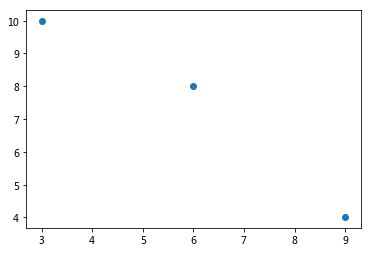

In [49]:
# 拉格朗日插值法

from scipy.interpolate import lagrange
x = [3, 6, 9]
y = [10, 8, 4]
plt.scatter(x, y)

# lagrange()输出一个多项式的n个系数，y=-0.1111x**2+0.3333x+10
print(lagrange(x, y))
print(lagrange(x, y)(10)) # 根据传入的x&y，插值找到x=10对应的y

# 异常值处理
异常值，也称“离群点”，是指样本中的个别值，其数值明显偏离其余的观测值。异常值的分析也称离群点的分析。  

## 异常值分析：3σ原则/箱形图分析
### 3σ原则
1. 3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍标准差的值。
2. 在正态分布的假设下，距离平均值3σ之外的值出现的概率为P( |x-μ| > σ) ≤ 0.003，属于极个别的小概率事件
3. 如果数据不服从正态分布，也可以用远离平均值的多少倍标准差来描述



KstestResult(statistic=0.006681218099175323, pvalue=0.7634332374968773)


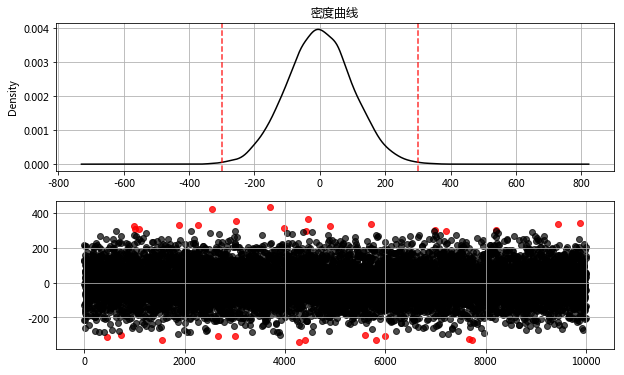

In [50]:
data = pd.Series(np.random.randn(10000)*100) # 创建数据
print(stats.kstest(data, 'norm', (data.mean(), data.std()))) # 正态性检验，p>0.05，正态分布

# 绘图
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 1, 1)
data.plot(kind='kde', grid=True, style='-k', title='密度曲线')
plt.axvline(3*data.std(), color='r', linestyle='--', alpha=0.8) # 绘制两条3σ线
plt.axvline(-3*data.std(), color='r', linestyle='--', alpha=0.8)

# 查看异常值分布
error = data[np.abs(data-data.mean()) > 3*data.std()] # 大于3σ的异常值
normal = data[np.abs(data-data.mean()) <= 3*data.std()] # 正常范围值
ax2 = fig.add_subplot(2, 1, 2)
plt.scatter(error.index, error, color='r', alpha=0.8)
plt.scatter(normal.index, normal, color='k', alpha=0.7)
plt.grid()

### 箱形图分析（推荐）


1. 箱形图使用分位数进行筛选，箱形图最大的优点在于**不受异常值的影响，能够准确稳定描绘出数据的离散分布情况**
2. 箱形图的五个关键数  
    * 下四分位数Q1
    * 中位数Q2
    * 上四分位数Q3
    * 上限：上限是非异常范围内的最大值。四分位距IQR=Q3-Q1，上限=Q3+1.5*IQR
    * 下限：下限是非异常范围内的最小值。下限=Q1-1.5*IQR

3. 箱形图使用四分位数进行筛选异常值，筛选结果略大于3σ原则
4. 箱形图的价值
    * 直观明了地识别数据批中的异常值
    * 利用箱线图判断数据批的偏态和尾重
    * 利用箱线图比较几批数据的形状

异常值共93条


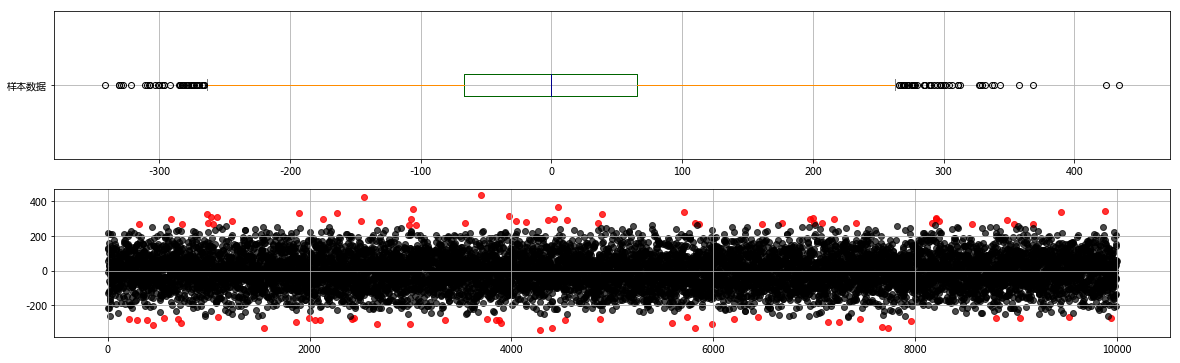

In [51]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(2, 1, 1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid=True, color=color, ax=ax1, label='样本数据')

# 统计性描述
s = data.describe()
q1 = s['25%'] # 下四分位数Q1
q3 = s['75%'] # 上四分位数Q3
iqr = q3-q1
mi = q1-1.5*iqr # 下限
ma = q3+1.5*iqr # 上限

# 查看异常值分布
error = data[(data<mi) | (data>ma)] # 大于上限，小于下限的异常值
normal = data[(data>=mi) & (data<=ma)] # 正常范围值
print('异常值共%i条' % len(error))
ax2 = fig.add_subplot(2, 1, 2)
plt.scatter(error.index, error, color='r', alpha=0.8)
plt.scatter(normal.index, normal, color='k', alpha=0.7)
plt.grid()

## 异常值处理方法：删除/修正填补

# 数据归一化/标准化
1. **数据标准化(normalization)**是将数据按比例缩放，使之落入一个小的缩放区间。在某些比较和评价的指标处理中常用，去除数据的单位限制，使其转化为无量纲的纯数值，便于不同单位或量级的指标进行比较和加权。
2. 数据标准化最典型的就是**归一化处理**(也称0-1标准化)，即将数据统一映射到[0, 1]区间上。
3. 标准化还常用**Z-Score标准化**

## 0-1标准化
1. 也称**min-max标准化/线性函数归一化/离差标准化**  
2. 将数据的最大值&最小值记录下来，并通过Max-Min最为基数(Max=1, Min=0)进行数据的归一化处理，处理后的数据区间为[0, 1]
3. 公式：$ x = (x-Min)/(Max-Min) $

In [52]:
df = pd.DataFrame({
    'value1': np.random.rand(10)*20,
    'value2': np.random.rand(10)*100
    })
print(df.head())

def f(df, *cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max() # 该列最大值
        mi = df_n[col].min() # 该列最小值
        df_n[col+'_n'] = (df_n[col]-mi)/(ma-mi) # 0-1标准化
    return df_n
df_n = f(df, 'value1', 'value2')
df_n

      value1     value2
0  11.543155  19.067561
1  16.768294  62.535224
2  18.180665  53.444429
3   5.310834  34.140289
4  13.449862  36.382373


,value1,value2,value1_n,value2_n
0,11.543155,19.067561,0.617191,0.201410
1,16.768294,62.535224,0.918544,0.738392
2,18.180665,53.444429,1.000000,0.626088
3,5.310834,34.140289,0.257751,0.387612
4,13.449862,36.382373,0.727158,0.415310
5,10.871336,52.062144,0.578445,0.609011
6,16.407396,13.957188,0.897729,0.138278
7,17.500526,30.637826,0.960774,0.344344
8,8.793831,2.763819,0.458628,0.000000
9,0.841687,83.711928,0.000000,1.000000


## Z-Score标准化
1. Z分数(Z-Score)是一个分数与平均数的差再除以标准差的过程。把原始数据转化为符合标准正态分布
2. Z值的量代表着原始分数与母体平均值之间的距离，以标准差为单位进行计算。在原始分数低于平均值时Z为负数，反之为正数
3. 在**分类/聚类**算法中需要使用距离来度量相似性时，常用Z-Score标准化
3. 数学意义：一个给定分数距离平均数多少个标准差
4. 公式：$ z = (x-\mu)/\sigma $

In [53]:
df = pd.DataFrame({
    'value1': np.random.rand(10)*20,
    'value2': np.random.rand(10)*100
    })
print(df.head())

def f_z(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean() # 平均数
        std = df_n[col].std() # 标准差
        df_n[col+'_zn'] = (df_n[col]-u)/std # Z-Score标准化
    return df_n
df_n = f_z(df, 'value1', 'value2')
print(df_n)

      value1     value2
0  19.052423  72.202239
1  18.936054  61.427057
2  18.763608  66.736645
3   6.542528  42.974411
4   8.863593  50.991688
      value1     value2  value1_zn  value2_zn
0  19.052423  72.202239   1.079488   0.439957
1  18.936054  61.427057   1.063152  -0.008201
2  18.763608  66.736645   1.038943   0.212633
3   6.542528  42.974411  -0.676671  -0.775677
4   8.863593  50.991688  -0.350836  -0.442226
5   0.678760  24.216887  -1.499836  -1.555834
6  10.032977  80.859149  -0.186676   0.800012
7  19.706714  90.061388   1.171338   1.182748
8   4.461057  31.609096  -0.968871  -1.248380
9   6.589832  95.163838  -0.670030   1.394968


# 数据连续属性离散化
1. 将连续属性变化为分散属性，即为**连续属性离散化**
2. 在数值的取值范围内设定若干个**离散划分点**，将取值范围划分为一些离散化的区间，最后用不同的符号或正数值代表每个子区间中的数值
3. **等宽法/等频法**

## 等宽法
将数据均匀划分为n等份，每份的间距相等(pandas.cut())
* right=False，将默认的右闭区间改为左闭区间
* labels，为每个分组添加标签

In [54]:
ages = [20, 22, 23, 25, 27, 37, 38, 50, 60, 63, 78]

# 划分为'18-25','26-35','36-60','61-'几个面元
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins) # 返回每个数值对应区间的tuple
# cats = pd.cut(ages, bins, right=False) # 默认为右闭区间，设置right=False改为左闭区间
cats

[(18, 25], (18, 25], (18, 25], (18, 25], (25, 35], ..., (35, 60], (35, 60], (35, 60], (60, 100], (60, 100]]
Length: 11
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [55]:
print(cats.codes) # 查看每个数值对应的区间(代号注释)，返回一个ndarray
print(cats.categories) # 查看每个数值对应的区间，返回一个index
print(pd.value_counts(cats)) # 区间计数

[0 0 0 0 1 2 2 2 2 3 3]
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')
(35, 60]     4
(18, 25]     4
(60, 100]    2
(25, 35]     1
dtype: int64


In [56]:
# 为每个分组添加标签
group_name = ['young', 'youngadult', 'middleaged', 'senior']
print(pd.cut(ages, bins, labels=group_name))

[young, young, young, young, youngadult, ..., middleaged, middleaged, middleaged, senior, senior]
Length: 11
Categories (4, object): [young < youngadult < middleaged < senior]


In [57]:
# 在DataFrame中进行操作

df = pd.DataFrame({'ages': ages})
print(df.head())
group_name = ['young', 'youngadult', 'middleaged', 'senior']
s = pd.cut(df['ages'], bins)
df['ages_a'] = s # 分组
print(df)
ages_sort = s.value_counts(sort=False) # 排序
print(ages_sort)

   ages
0    20
1    22
2    23
3    25
4    27
    ages     ages_a
0     20   (18, 25]
1     22   (18, 25]
2     23   (18, 25]
3     25   (18, 25]
4     27   (25, 35]
5     37   (35, 60]
6     38   (35, 60]
7     50   (35, 60]
8     60   (35, 60]
9     63  (60, 100]
10    78  (60, 100]
(18, 25]     4
(25, 35]     1
(35, 60]     4
(60, 100]    2
Name: ages, dtype: int64


## 等频法
1. 将相同数量的记录放进每个区间，pandas.qcut()
2. pandas.qcut()根据样本分位数对数据进行面元划分，得到**大小基本相等**的面元，但不能保证每个面元含有相同数据个数

In [58]:
s = pd.Series(np.random.randn(100))
print(s.head(), '\n')
cats = pd.qcut(s, 4) # 依照四分位数进行切割
# 也可以设置自定义分位数进行切割，前闭后闭
# cats = pd.qcut(s, [0, 0.1, 0.5, 0.9, 1])
print(cats.head(), '\n')
print(pd.value_counts(cats))


0    0.500990
1    0.502304
2    0.264542
3    0.323269
4   -0.781570
dtype: float64 

0                  (-0.025, 0.708]
1                  (-0.025, 0.708]
2                  (-0.025, 0.708]
3                  (-0.025, 0.708]
4    (-2.4099999999999997, -0.741]
dtype: category
Categories (4, interval[float64]): [(-2.4099999999999997, -0.741] < (-0.741, -0.025] < (-0.025, 0.708] < (0.708, 2.586]] 

(0.708, 2.586]                   25
(-0.025, 0.708]                  25
(-0.741, -0.025]                 25
(-2.4099999999999997, -0.741]    25
dtype: int64


# 参考链接
1. jupyter notebook中matplotlib绘图包的中文乱码问题：https://blog.csdn.net/u014465934/article/details/80377470
2. 搞懂箱形图分析，快速识别异常值：https://blog.csdn.net/clairliu/article/details/79217546
3. 如何在jupyter Notebook中包含图像或图片？https://vimsky.com/article/3721.html
4. 在jupyter notebook 中编辑公式https://www.cnblogs.com/laoduan/p/7641698.html